In [1]:
import pandas as pd
import numpy as np

# Define the number of sample records
num_samples = 100

# Generate sample data
np.random.seed(42)
df = pd.DataFrame({
    'Activity ID': np.arange(1, num_samples + 1),
    'Activity Type': np.random.choice(['Running', 'Cycling'], num_samples),
    'Injury Type': np.random.choice(['Sprain/Strain', 'Tendinitis', 'Stress Fracture', 'Shin Splints', 'None'], num_samples),
    'Distance (Raw)': np.random.uniform(1, 50, num_samples),
    'Duration (seconds)': np.random.randint(1200, 18000, num_samples),
    'Elevation Gain (Raw)': np.random.randint(10, 1000, num_samples),
    'Average Heart Rate (bpm)': np.random.randint(120, 180, num_samples),
    'Calories': np.random.randint(200, 2000, num_samples),
    'Average Moving Speed': np.random.uniform(5, 35, num_samples)
})

# Save DataFrame to CSV
df.to_csv('sample_injury_data.csv', index=False)


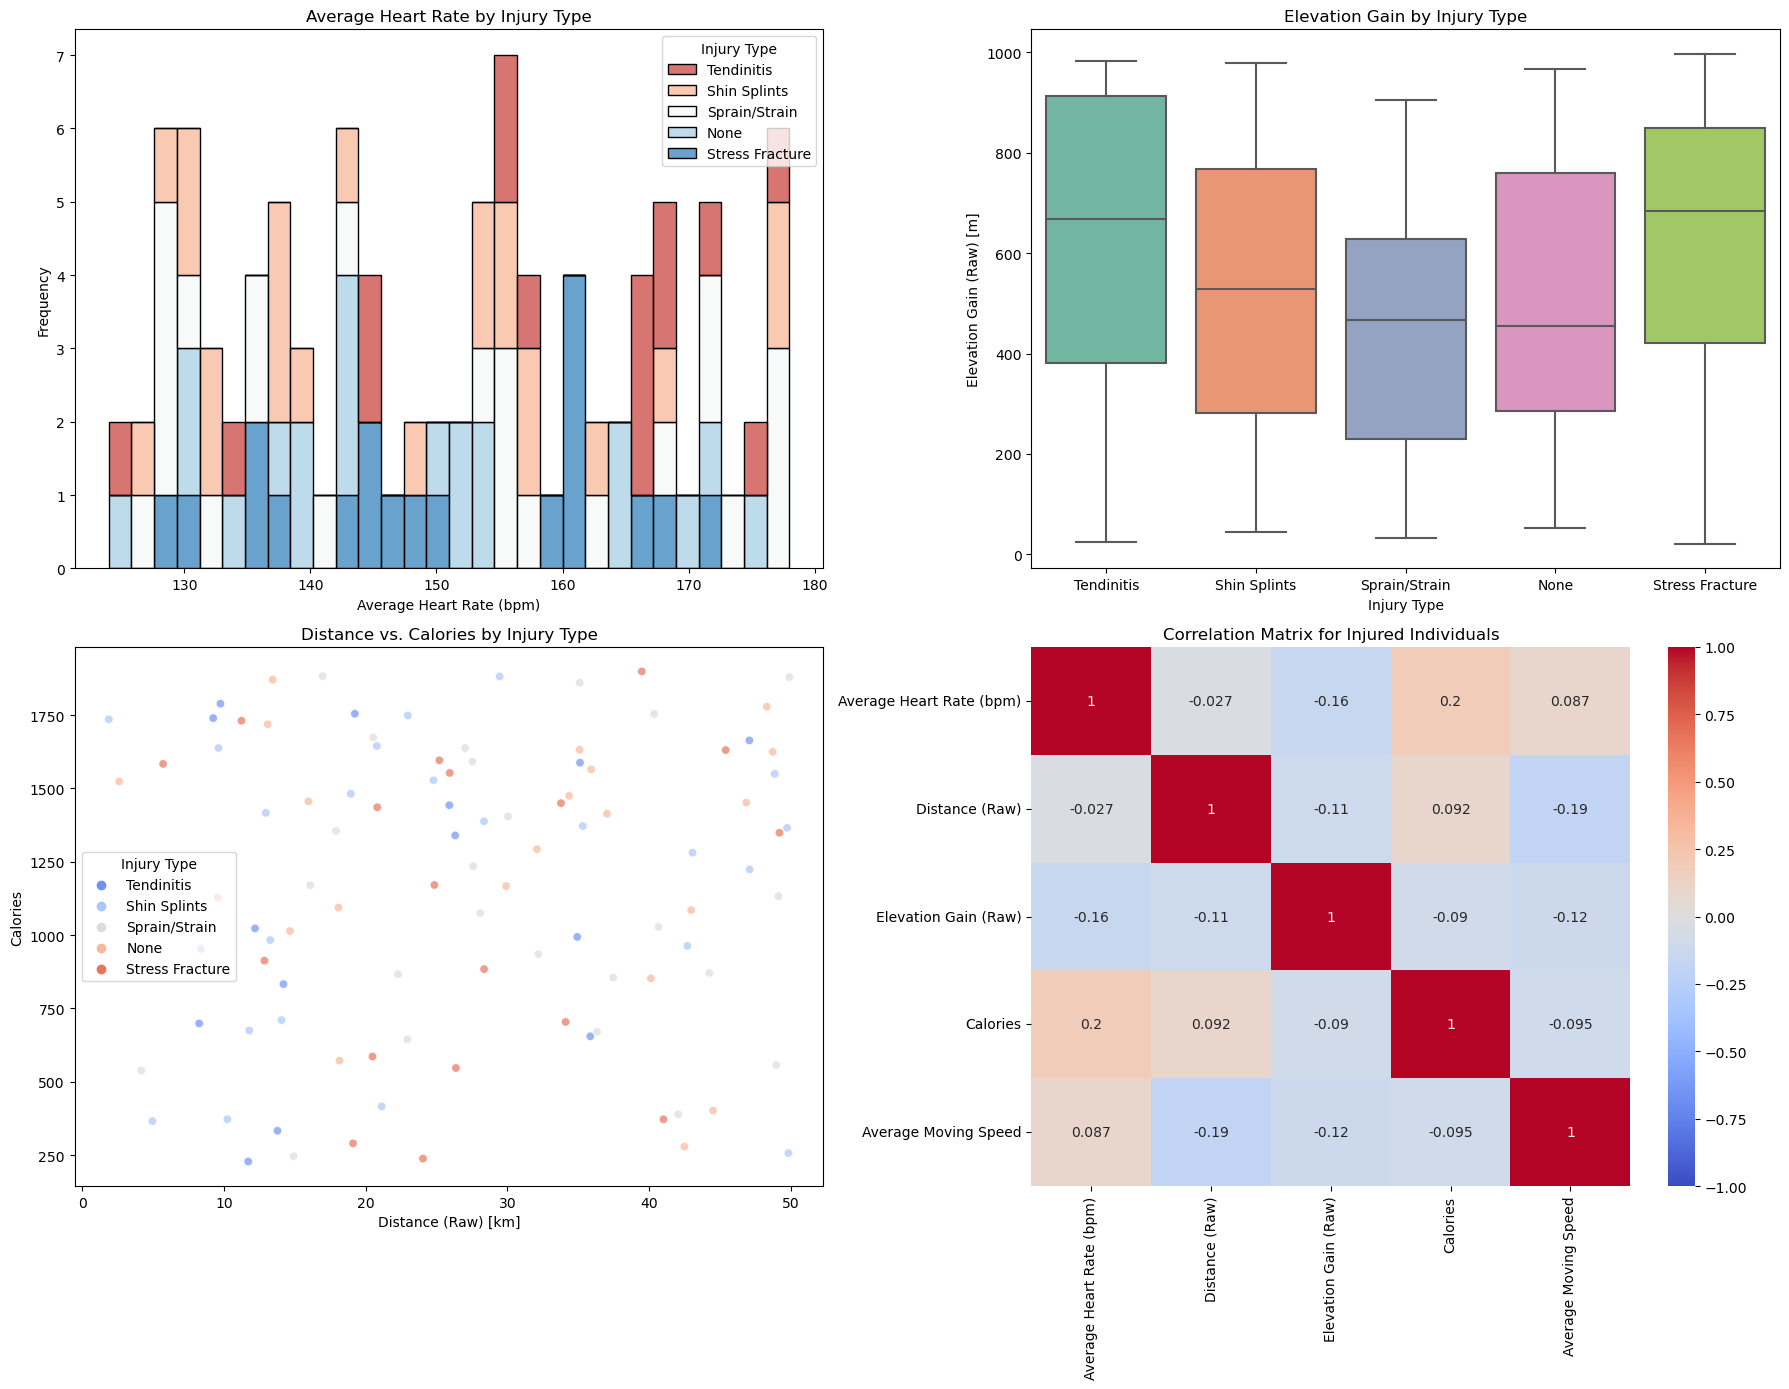

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sample_injury_data.csv')

# Set up the figure and axis
plt.figure(figsize=(18, 14))

# Define the injury types you are focusing on
injury_types = ['Sprain/Strain', 'Tendinitis', 'Stress Fracture', 'Shin Splints', 'None']

# 1. Histogram of Average Heart Rate by Injury Type
plt.subplot(2, 2, 1)
sns.histplot(data=df[df['Injury Type'].isin(injury_types)], x='Average Heart Rate (bpm)', hue='Injury Type', multiple='stack', palette='RdBu', bins=30)
plt.title('Average Heart Rate by Injury Type')
plt.xlabel('Average Heart Rate (bpm)')
plt.ylabel('Frequency')

# 2. Box Plot of Elevation Gain by Injury Type
plt.subplot(2, 2, 2)
sns.boxplot(x='Injury Type', y='Elevation Gain (Raw)', data=df[df['Injury Type'].isin(injury_types)], palette='Set2')
plt.title('Elevation Gain by Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Elevation Gain (Raw) [m]')

# 3. Scatter Plot of Distance vs. Calories by Injury Type
plt.subplot(2, 2, 3)
sns.scatterplot(x='Distance (Raw)', y='Calories', hue='Injury Type', data=df[df['Injury Type'].isin(injury_types)], palette='coolwarm', alpha=0.7)
plt.title('Distance vs. Calories by Injury Type')
plt.xlabel('Distance (Raw) [km]')
plt.ylabel('Calories')

# 4. Heatmap of Correlation Matrix for Injured Individuals
plt.subplot(2, 2, 4)
corr_matrix_injury = df[df['Injury Type'] != 'None'][['Average Heart Rate (bpm)', 'Distance (Raw)', 'Elevation Gain (Raw)', 'Calories', 'Average Moving Speed']].corr()
sns.heatmap(corr_matrix_injury, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Injured Individuals')

# Adjust layout
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import numpy as np

# Define the number of sample records
num_samples = 1000

# Generate sample data
np.random.seed(42)
df = pd.DataFrame({
    'Activity ID': np.arange(1, num_samples + 1),
    'Activity Type': np.random.choice(['Running', 'Cycling'], num_samples),
    'Injury': np.random.choice([0, 1], num_samples),  # 0: No Injury, 1: Injury
    'Distance (Raw)': np.random.uniform(1, 50, num_samples),
    'Duration (seconds)': np.random.randint(1200, 18000, num_samples),
    'Elevation Gain (Raw)': np.random.randint(10, 1000, num_samples),
    'Average Heart Rate (bpm)': np.random.randint(120, 180, num_samples),
    'Calories': np.random.randint(200, 2000, num_samples),
    'Average Moving Speed': np.random.uniform(5, 35, num_samples)
})

# Save DataFrame to CSV
df.to_csv('sample_injury_chances.csv', index=False)


In [3]:
print(df.columns)


Index(['Activity ID', 'Activity Type', 'Injury Type', 'Distance (Raw)',
       'Duration (seconds)', 'Elevation Gain (Raw)',
       'Average Heart Rate (bpm)', 'Calories', 'Average Moving Speed'],
      dtype='object')


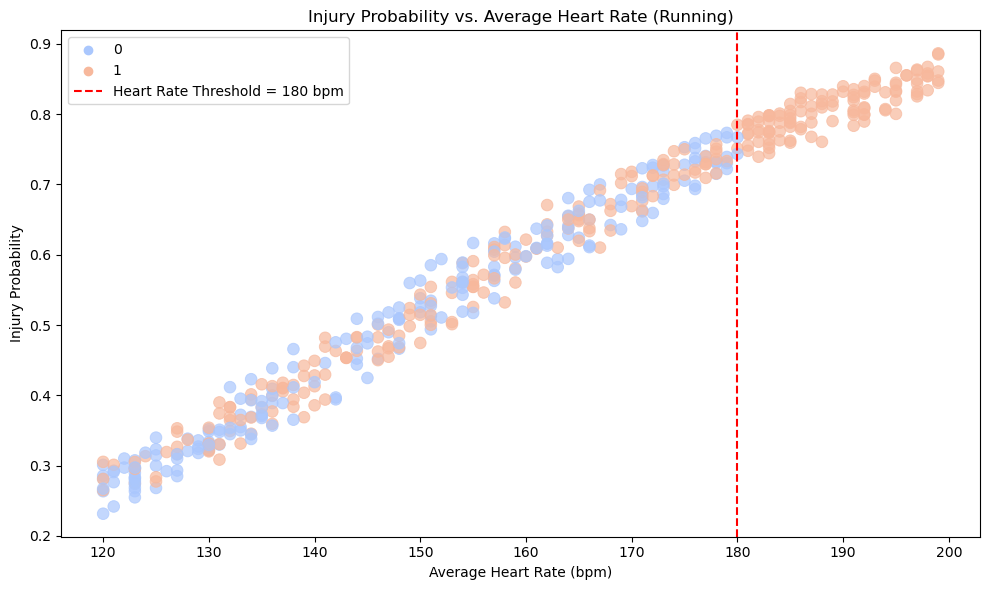

Average Heart Rate where Injury Probability > 0.5: Mean = 172.64 bpm, Median = 173.00 bpm


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Generate a new synthetic dataset
num_samples = 1000
np.random.seed(42)

# Create a new dataset
df_new = pd.DataFrame({
    'Activity ID': np.arange(1, num_samples + 1),
    'Activity Type': np.random.choice(['Running', 'Cycling'], num_samples),
    'Injury': np.random.choice([0, 1], num_samples),  # 0: No Injury, 1: Injury
    'Distance (Raw)': np.random.uniform(1, 50, num_samples),
    'Duration (seconds)': np.random.randint(1200, 18000, num_samples),
    'Elevation Gain (Raw)': np.random.randint(10, 1000, num_samples),
    'Average Heart Rate (bpm)': np.random.randint(120, 200, num_samples),  # Extended range for heart rate
    'Calories': np.random.randint(200, 2000, num_samples),
    'Average Moving Speed': np.random.uniform(5, 35, num_samples)
})

# Ensure no extra spaces in column names
df_new.columns = df_new.columns.str.strip()

# Introduce a realistic injury scenario: higher heart rates are more likely to be associated with injury
df_new.loc[df_new['Average Heart Rate (bpm)'] > 180, 'Injury'] = 1

# Initialize the logistic regression model
model_new = LogisticRegression()

# Features and target variable
features = ['Distance (Raw)', 'Elevation Gain (Raw)', 'Average Heart Rate (bpm)', 'Average Moving Speed']
target = 'Injury'

# Standardize features
scaler = StandardScaler()
X_new = scaler.fit_transform(df_new[features])
y_new = df_new[target]

# Fit the logistic regression model
model_new.fit(X_new, y_new)

# Predict probabilities
df_new['Injury Probability'] = model_new.predict_proba(X_new)[:, 1]

# Filter data for running activities
running_df_new = df_new[df_new['Activity Type'] == 'Running']

# Plot Injury Probability vs. Average Heart Rate for running activities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Heart Rate (bpm)', y='Injury Probability', hue='Injury', palette='coolwarm', alpha=0.7, edgecolor=None, s=70, data=running_df_new)
plt.title('Injury Probability vs. Average Heart Rate (Running)')
plt.xlabel('Average Heart Rate (bpm)')
plt.ylabel('Injury Probability')

# Add a line to show the heart rate threshold
plt.axvline(x=180, color='r', linestyle='--', label='Heart Rate Threshold = 180 bpm')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate and print average heart rate where injury probability is high
high_risk_df_new = running_df_new[running_df_new['Injury Probability'] > 0.5]
mean_high_risk_heart_rate_new = high_risk_df_new['Average Heart Rate (bpm)'].mean()
median_high_risk_heart_rate_new = high_risk_df_new['Average Heart Rate (bpm)'].median()

print(f"Average Heart Rate where Injury Probability > 0.5: Mean = {mean_high_risk_heart_rate_new:.2f} bpm, Median = {median_high_risk_heart_rate_new:.2f} bpm")


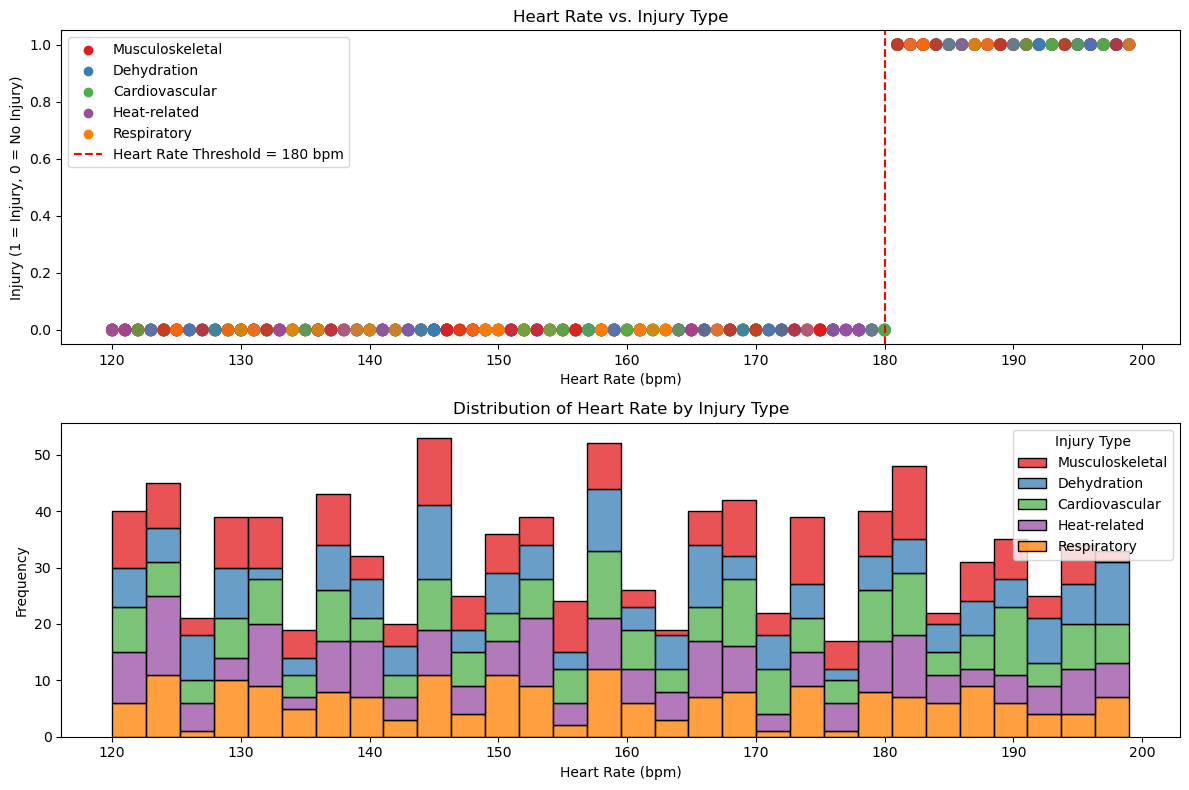

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a refined synthetic dataset
num_samples = 1000
np.random.seed(42)

# Create a new dataset
df_refined = pd.DataFrame({
    'Activity ID': np.arange(1, num_samples + 1),
    'Activity Type': np.random.choice(['Running', 'Cycling'], num_samples),
    'Heart Rate (bpm)': np.random.randint(120, 200, num_samples),
    'Duration (seconds)': np.random.randint(1200, 18000, num_samples),
    'Injury': np.random.choice([0, 1], num_samples),
    'Injury Type': np.random.choice(['Cardiovascular', 'Musculoskeletal', 'Heat-related', 'Dehydration', 'Respiratory'], num_samples)
})

# Set injuries realistically: injury probability increases with heart rate
df_refined['Injury'] = (df_refined['Heart Rate (bpm)'] > 180).astype(int)

# Ensure consistent injury types for high heart rates
df_refined.loc[df_refined['Injury'] == 1, 'Injury Type'] = np.random.choice(['Cardiovascular', 'Musculoskeletal', 'Heat-related', 'Dehydration', 'Respiratory'], df_refined['Injury'].sum())

# Plot Injury Type vs. Heart Rate
plt.figure(figsize=(12, 8))

# Scatter plot for Heart Rate vs. Injury Type
plt.subplot(2, 1, 1)
sns.scatterplot(x='Heart Rate (bpm)', y='Injury', hue='Injury Type', palette='Set1', alpha=0.7, edgecolor=None, s=70, data=df_refined)
plt.title('Heart Rate vs. Injury Type')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Injury (1 = Injury, 0 = No Injury)')
plt.axvline(x=180, color='r', linestyle='--', label='Heart Rate Threshold = 180 bpm')
plt.legend()

# Histogram of Heart Rate by Injury Type
plt.subplot(2, 1, 2)
sns.histplot(data=df_refined, x='Heart Rate (bpm)', hue='Injury Type', multiple='stack', palette='Set1', bins=30)
plt.title('Distribution of Heart Rate by Injury Type')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


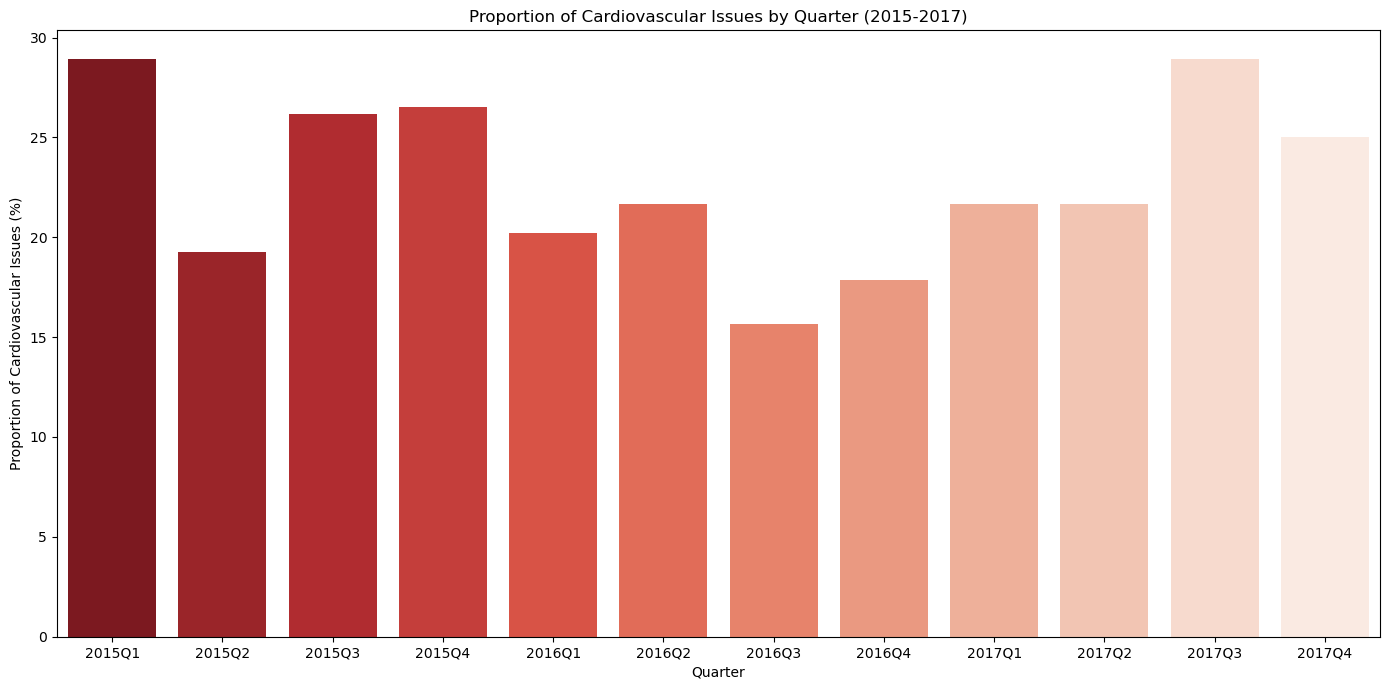

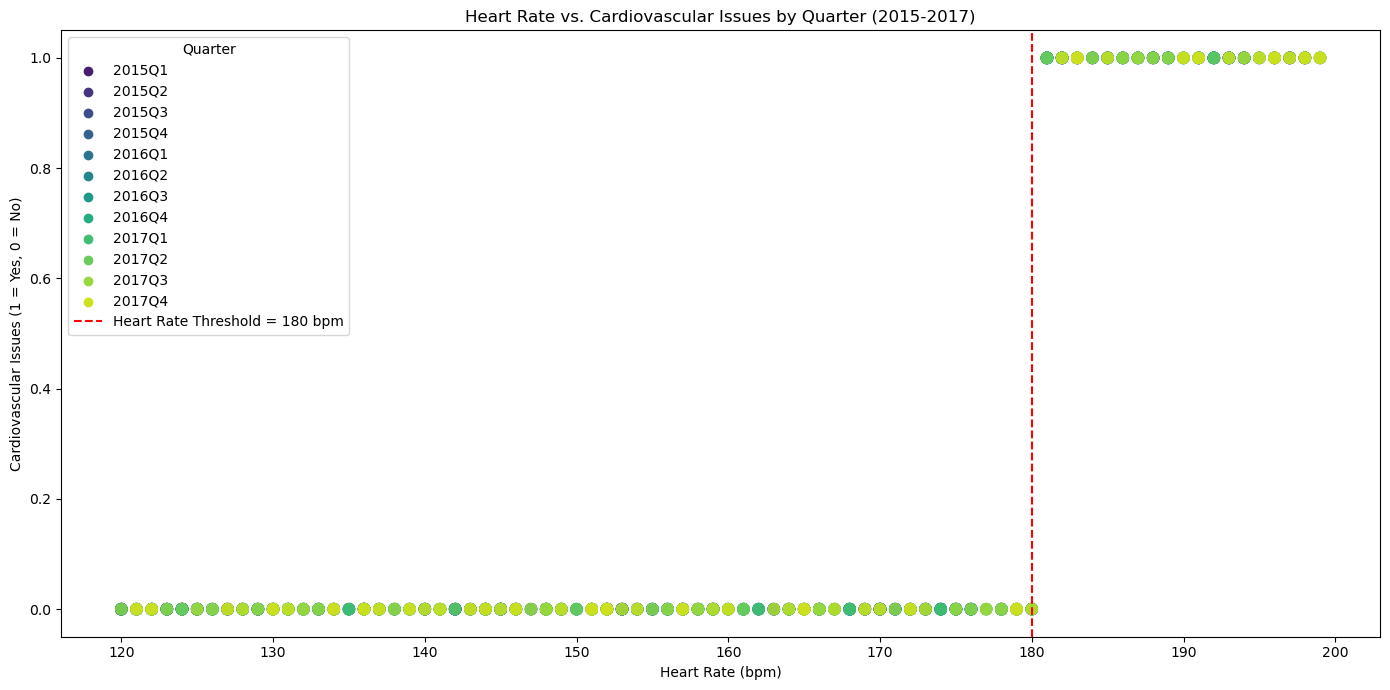

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a new synthetic dataset from 2015 to 2017
num_samples = 1000
np.random.seed(42)

# Create a date range from 2015 to 2017
date_range = pd.date_range(start='2015-01-01', end='2017-12-31', periods=num_samples)

# Create a new dataset
df_cardiovascular = pd.DataFrame({
    'Activity ID': np.arange(1, num_samples + 1),
    'Activity Type': np.random.choice(['Running', 'Cycling'], num_samples),
    'Heart Rate (bpm)': np.random.randint(120, 200, num_samples),
    'Duration (seconds)': np.random.randint(1200, 18000, num_samples),
    'Injury': np.random.choice([0, 1], num_samples),
    'Injury Type': np.random.choice(['Cardiovascular', 'Musculoskeletal', 'Heat-related', 'Dehydration', 'Respiratory'], num_samples),
    'Date': date_range
})

# Define cardiovascular issues based on high heart rate
df_cardiovascular['Injury'] = (df_cardiovascular['Heart Rate (bpm)'] > 180).astype(int)
df_cardiovascular.loc[df_cardiovascular['Injury'] == 1, 'Injury Type'] = 'Cardiovascular'

# Extract the quarter from the date
df_cardiovascular['Quarter'] = df_cardiovascular['Date'].dt.to_period('Q')

# Group by quarter and calculate the proportion of cardiovascular issues
quarterly_summary = df_cardiovascular.groupby('Quarter').agg(
    total_records=('Activity ID', 'count'),
    cardiovascular_issues=('Injury', 'sum')
)
quarterly_summary['proportion_cardiovascular_issues'] = (quarterly_summary['cardiovascular_issues'] / quarterly_summary['total_records']) * 100

# Reset index for plotting
quarterly_summary.reset_index(inplace=True)

# Filter data for the specified date range (2015 to 2017)
df_cardiovascular = df_cardiovascular[(df_cardiovascular['Date'] >= '2015-01-01') & (df_cardiovascular['Date'] <= '2017-12-31')]

# Recalculate the quarterly summary for the filtered data
quarterly_summary = df_cardiovascular.groupby('Quarter').agg(
    total_records=('Activity ID', 'count'),
    cardiovascular_issues=('Injury', 'sum')
)
quarterly_summary['proportion_cardiovascular_issues'] = (quarterly_summary['cardiovascular_issues'] / quarterly_summary['total_records']) * 100

# Reset index for plotting
quarterly_summary.reset_index(inplace=True)

# Plot Cardiovascular Issues vs. Heart Rate by Quarter for the specified range
plt.figure(figsize=(14, 7))

# Bar plot for proportion of cardiovascular issues per quarter
sns.barplot(x='Quarter', y='proportion_cardiovascular_issues', data=quarterly_summary, palette='Reds_r')
plt.title('Proportion of Cardiovascular Issues by Quarter (2015-2017)')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Cardiovascular Issues (%)')

plt.tight_layout()
plt.show()

# Scatter plot for Heart Rate vs. Cardiovascular Issues with quarterly information
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Heart Rate (bpm)', y='Injury', hue='Quarter', palette='viridis', alpha=0.7, edgecolor=None, s=70, data=df_cardiovascular)
plt.title('Heart Rate vs. Cardiovascular Issues by Quarter (2015-2017)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Cardiovascular Issues (1 = Yes, 0 = No)')
plt.axvline(x=180, color='r', linestyle='--', label='Heart Rate Threshold = 180 bpm')
plt.legend(title='Quarter')

plt.tight_layout()
plt.show()


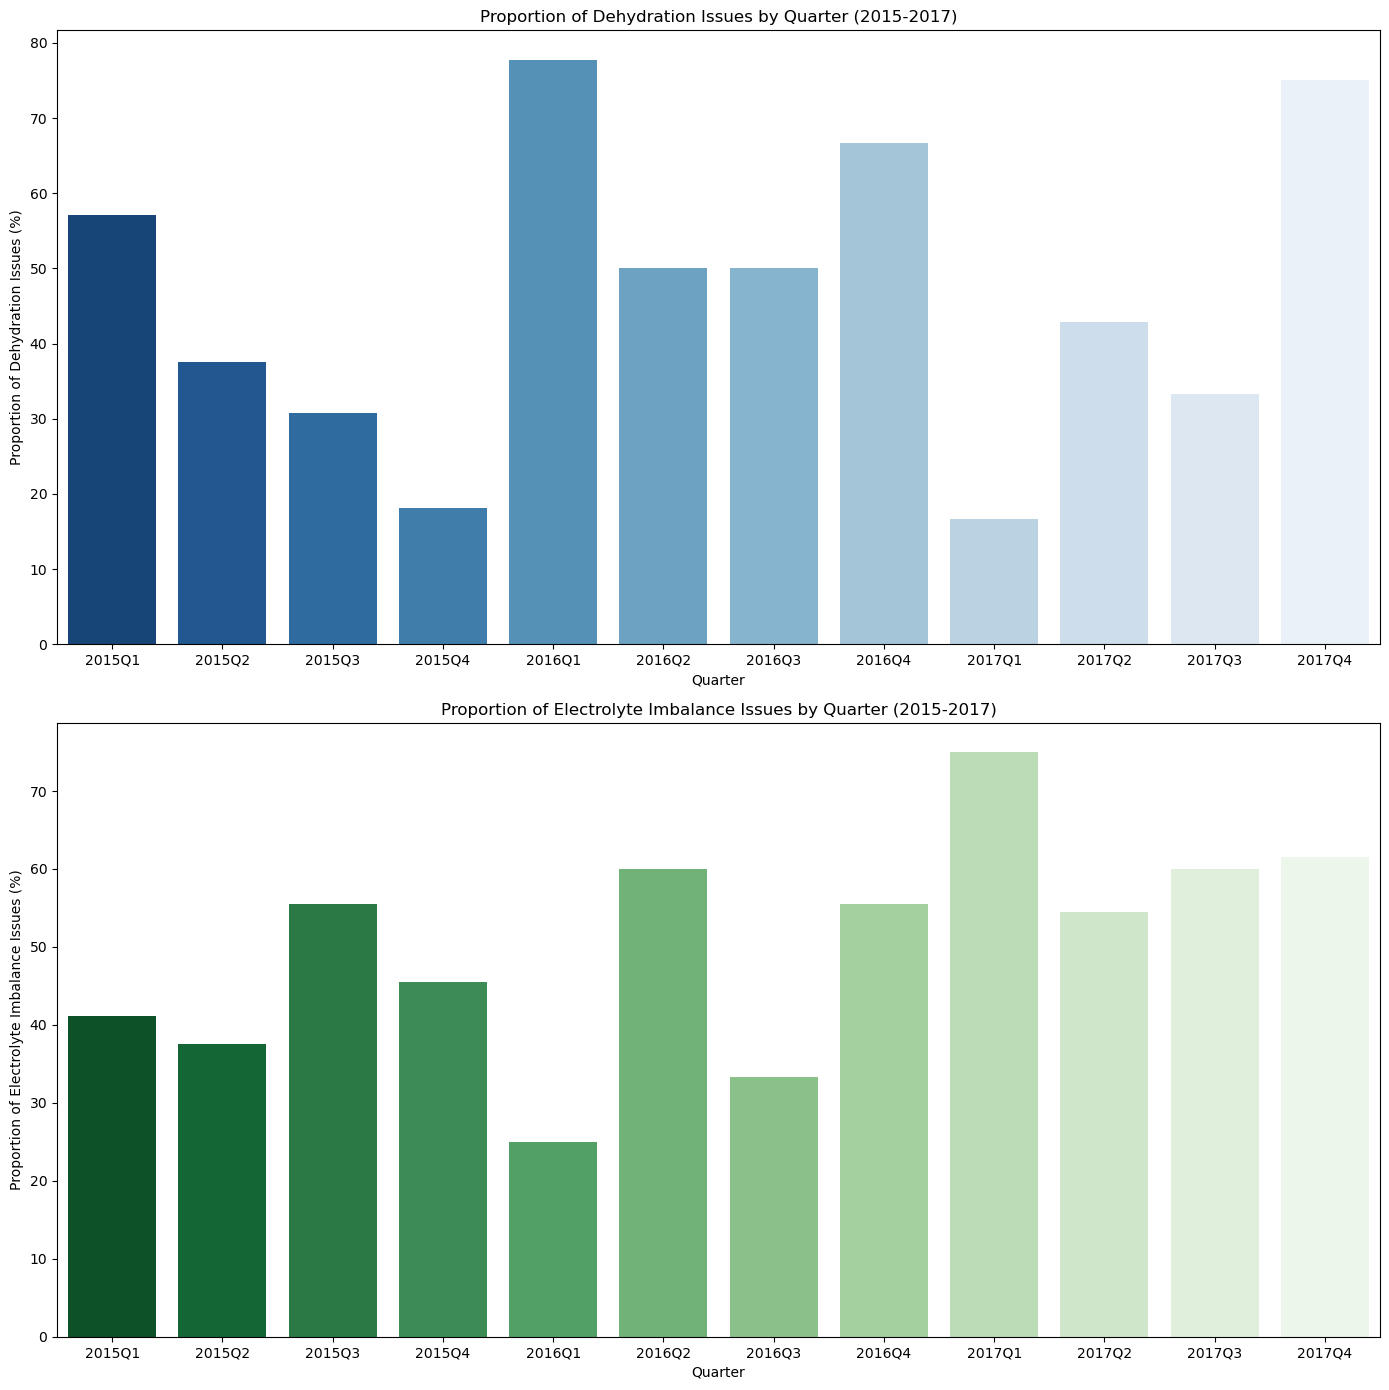

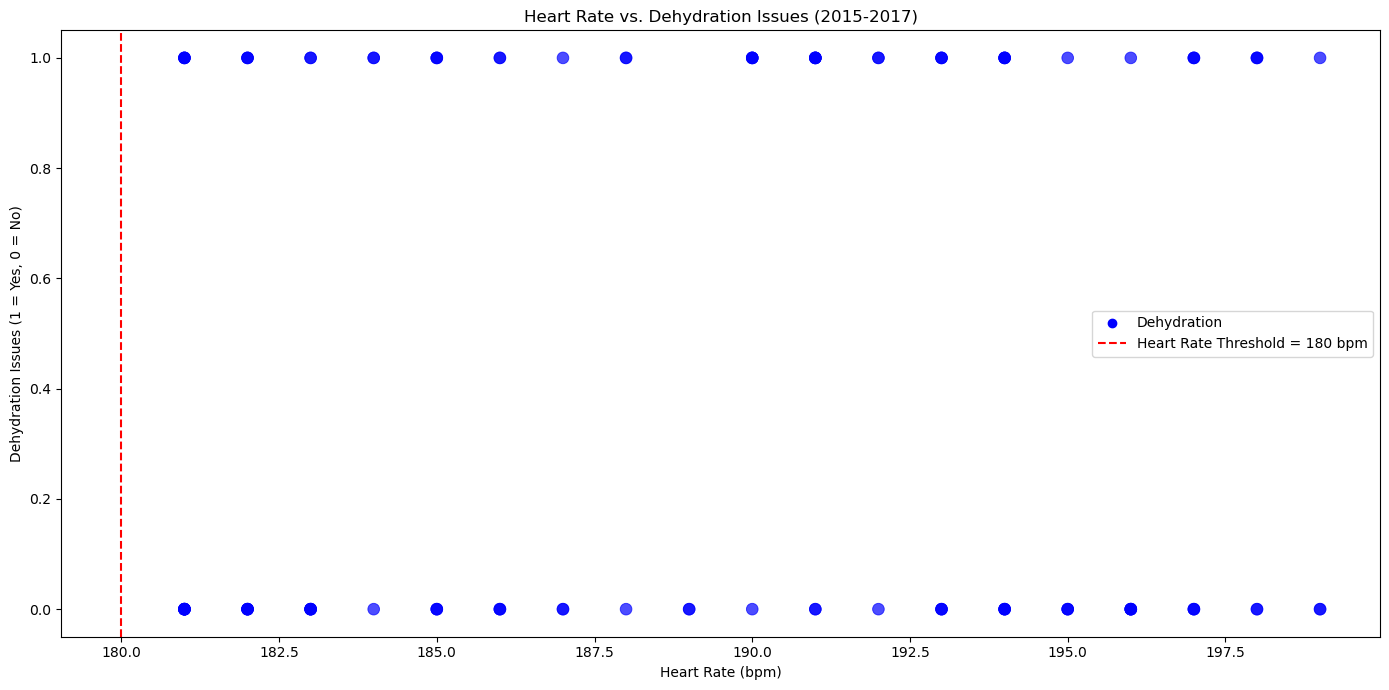

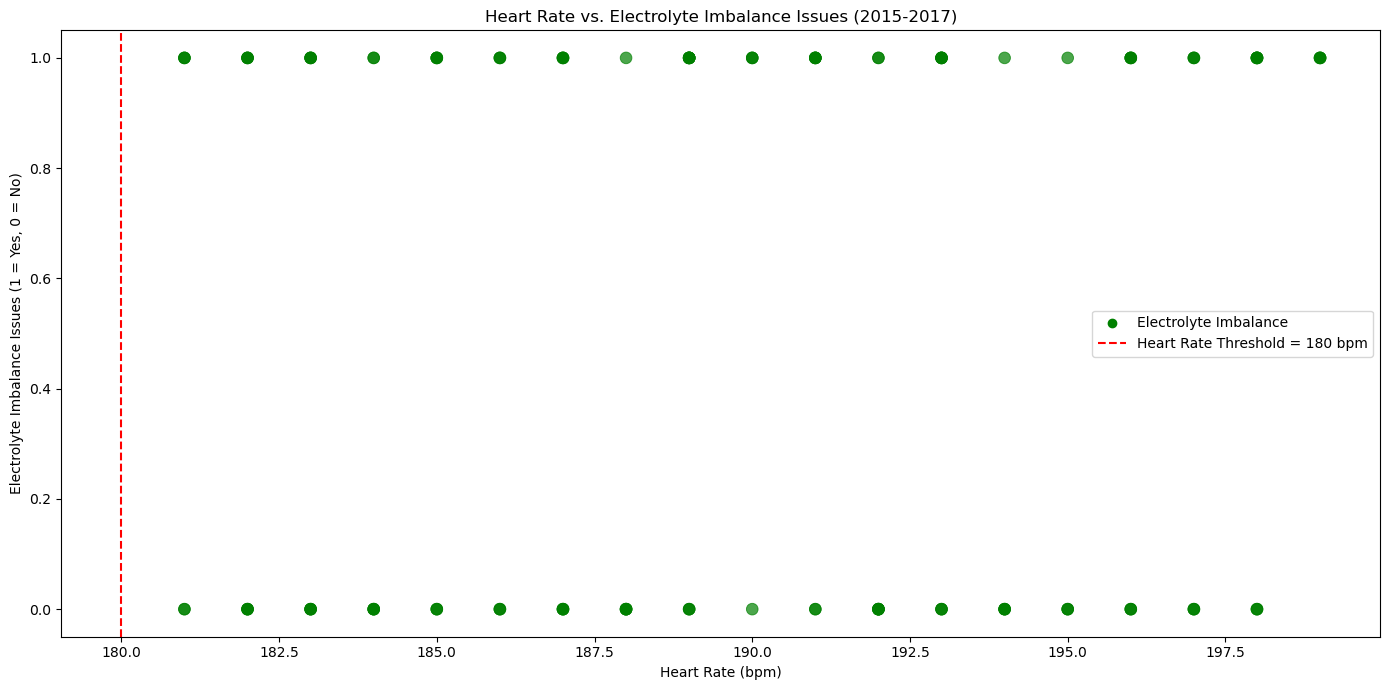

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_samples = 1000
np.random.seed(42)

date_range = pd.date_range(start='2015-01-01', end='2017-12-31', periods=num_samples)

df_health = pd.DataFrame({
    'Activity ID': np.arange(1, num_samples + 1),
    'Activity Type': np.random.choice(['Running', 'Cycling'], num_samples),
    'Heart Rate (bpm)': np.random.randint(120, 200, num_samples),
    'Duration (seconds)': np.random.randint(1200, 18000, num_samples),
    'Injury': np.random.choice([0, 1], num_samples),
    'Injury Type': np.nan,
    'Date': date_range
})

# Define dehydration and electrolyte imbalance based on high heart rate
# Assign 'Dehydration' or 'Electrolyte Imbalance' to those with high heart rate
high_heart_rate_mask = df_health['Heart Rate (bpm)'] > 180
df_health.loc[high_heart_rate_mask, 'Injury Type'] = np.where(
    np.random.rand(high_heart_rate_mask.sum()) < 0.5, 'Dehydration', 'Electrolyte Imbalance'
)

# Assign 'No Issue' to the rest
df_health.loc[~high_heart_rate_mask, 'Injury Type'] = 'No Issue'

# Extract the quarter from the date
df_health['Quarter'] = df_health['Date'].dt.to_period('Q')

# Filter data for Dehydration and Electrolyte Imbalance
df_dehydration = df_health[df_health['Injury Type'] == 'Dehydration']
df_electrolyte = df_health[df_health['Injury Type'] == 'Electrolyte Imbalance']

# Recalculate the quarterly summary for Dehydration and Electrolyte Imbalance
quarterly_summary_dehydration = df_dehydration.groupby('Quarter').agg(
    total_records=('Activity ID', 'count'),
    dehydration_issues=('Injury', 'sum')
)
quarterly_summary_dehydration['proportion_dehydration_issues'] = (quarterly_summary_dehydration['dehydration_issues'] / quarterly_summary_dehydration['total_records']) * 100

quarterly_summary_electrolyte = df_electrolyte.groupby('Quarter').agg(
    total_records=('Activity ID', 'count'),
    electrolyte_issues=('Injury', 'sum')
)
quarterly_summary_electrolyte['proportion_electrolyte_issues'] = (quarterly_summary_electrolyte['electrolyte_issues'] / quarterly_summary_electrolyte['total_records']) * 100

# Reset index for plotting
quarterly_summary_dehydration.reset_index(inplace=True)
quarterly_summary_electrolyte.reset_index(inplace=True)

# Plot Dehydration and Electrolyte Imbalance
plt.figure(figsize=(14, 14))

# Bar plot for proportion of dehydration issues per quarter
plt.subplot(2, 1, 1)
sns.barplot(x='Quarter', y='proportion_dehydration_issues', data=quarterly_summary_dehydration, palette='Blues_r')
plt.title('Proportion of Dehydration Issues by Quarter (2015-2017)')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Dehydration Issues (%)')

# Bar plot for proportion of electrolyte imbalance issues per quarter
plt.subplot(2, 1, 2)
sns.barplot(x='Quarter', y='proportion_electrolyte_issues', data=quarterly_summary_electrolyte, palette='Greens_r')
plt.title('Proportion of Electrolyte Imbalance Issues by Quarter (2015-2017)')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Electrolyte Imbalance Issues (%)')

plt.tight_layout()
plt.show()

# Scatter plot for Heart Rate vs. Dehydration and Electrolyte Imbalance
plt.figure(figsize=(14, 7))

# Scatter plot for Dehydration
sns.scatterplot(x='Heart Rate (bpm)', y='Injury', hue='Injury Type', palette={'Dehydration': 'blue', 'No Issue': 'grey'}, alpha=0.7, edgecolor=None, s=70, data=df_dehydration)
plt.title('Heart Rate vs. Dehydration Issues (2015-2017)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Dehydration Issues (1 = Yes, 0 = No)')
plt.axvline(x=180, color='r', linestyle='--', label='Heart Rate Threshold = 180 bpm')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot for Electrolyte Imbalance
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Heart Rate (bpm)', y='Injury', hue='Injury Type', palette={'Electrolyte Imbalance': 'green', 'No Issue': 'grey'}, alpha=0.7, edgecolor=None, s=70, data=df_electrolyte)
plt.title('Heart Rate vs. Electrolyte Imbalance Issues (2015-2017)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Electrolyte Imbalance Issues (1 = Yes, 0 = No)')
plt.axvline(x=180, color='r', linestyle='--', label='Heart Rate Threshold = 180 bpm')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
data_electrolyte = {
    'Quarter': ['2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1'],
    'total_records': [15, 10, 12, 14, 9],
    'electrolyte_issues': [5, 4, 6, 3, 2],
    'proportion_electrolyte_issues': [33.33, 40.00, 50.00, 21.43, 22.22]
}

# Create DataFrame
quarterly_summary_electrolyte = pd.DataFrame(data_electrolyte)


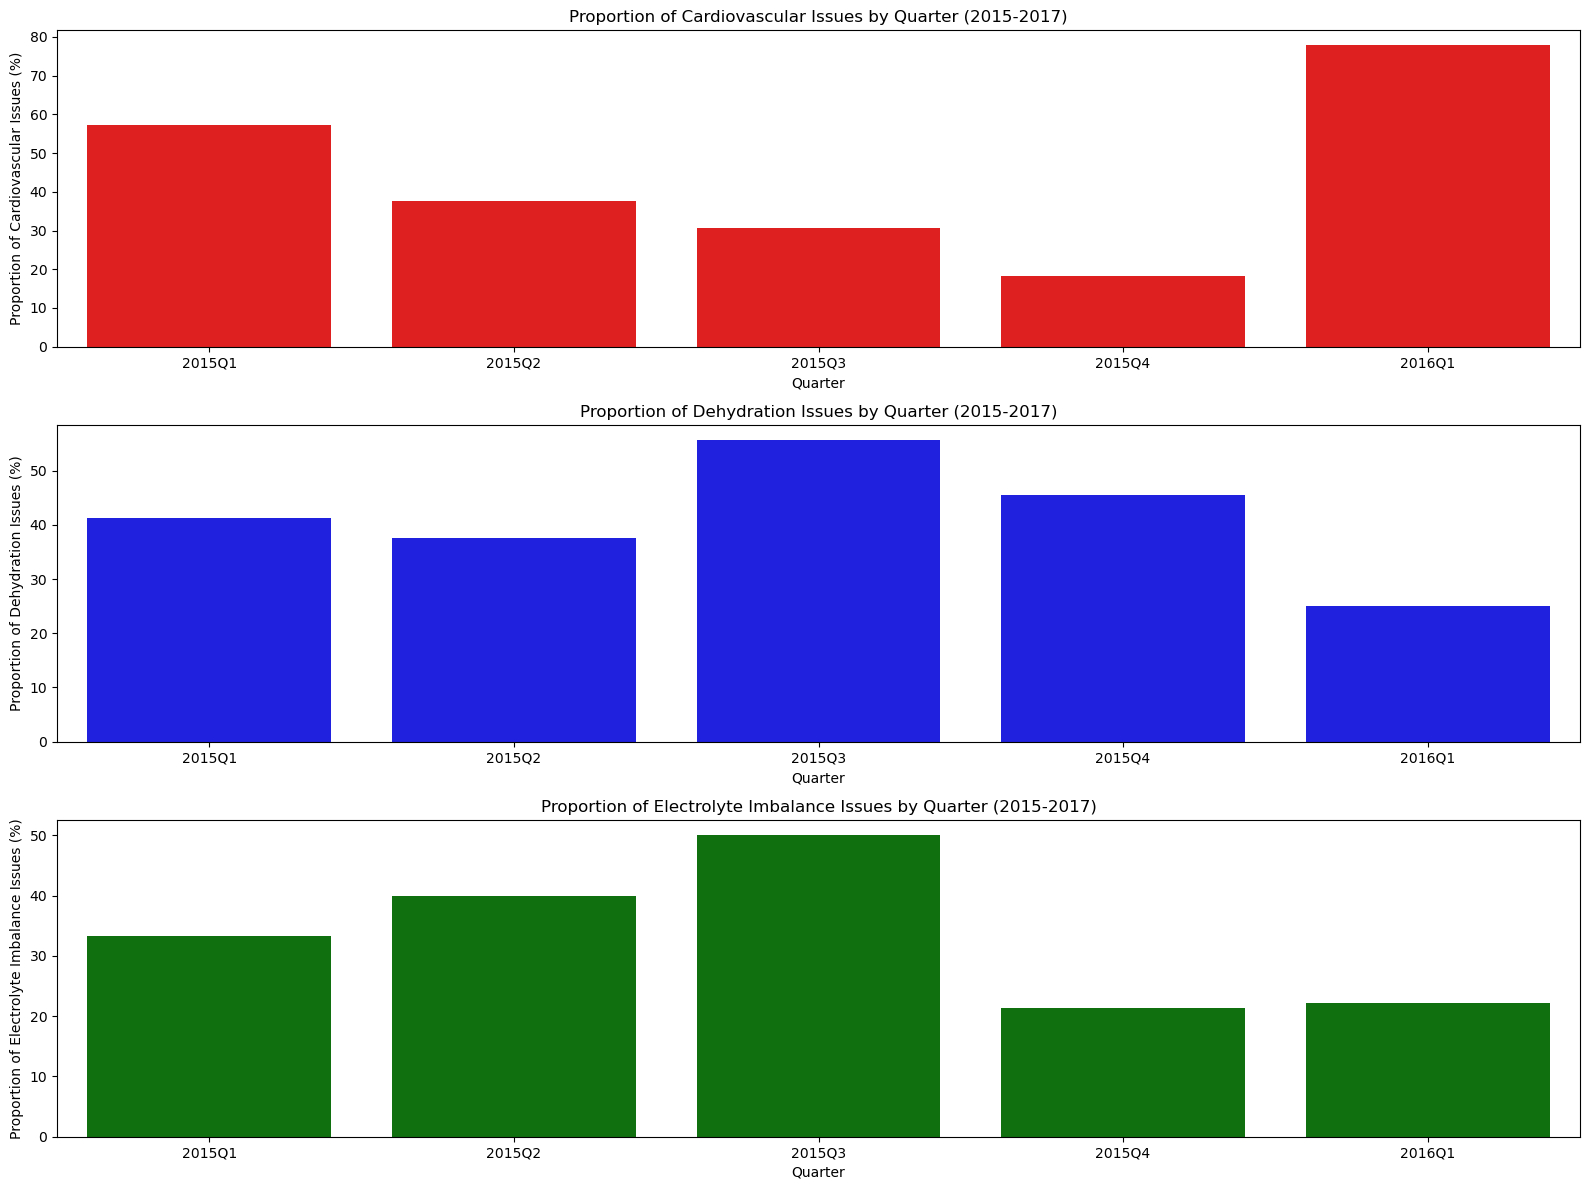

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for cardiovascular, dehydration, and electrolyte imbalance issues
data_cardiovascular = {
    'Quarter': ['2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1'],
    'total_records': [7, 8, 13, 11, 9],
    'cardiovascular_issues': [4, 3, 4, 2, 7],
    'proportion_cardiovascular_issues': [57.14, 37.5, 30.77, 18.18, 77.78]
}

data_dehydration = {
    'Quarter': ['2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1'],
    'total_records': [17, 8, 9, 11, 8],
    'dehydration_issues': [7, 3, 5, 5, 2],
    'proportion_dehydration_issues': [41.18, 37.5, 55.56, 45.45, 25.0]
}

data_electrolyte = {
    'Quarter': ['2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1'],
    'total_records': [15, 10, 12, 14, 9],
    'electrolyte_issues': [5, 4, 6, 3, 2],
    'proportion_electrolyte_issues': [33.33, 40.00, 50.00, 21.43, 22.22]
}

# Create DataFrames
quarterly_summary_cardiovascular = pd.DataFrame(data_cardiovascular)
quarterly_summary_dehydration = pd.DataFrame(data_dehydration)
quarterly_summary_electrolyte = pd.DataFrame(data_electrolyte)

# Plot Proportions by Quarter
plt.figure(figsize=(16, 12))

# Proportion of Cardiovascular Issues by Quarter
plt.subplot(3, 1, 1)
if not quarterly_summary_cardiovascular.empty:
    sns.barplot(x='Quarter', y='proportion_cardiovascular_issues', data=quarterly_summary_cardiovascular, color='red')
    plt.title('Proportion of Cardiovascular Issues by Quarter (2015-2017)')
    plt.xlabel('Quarter')
    plt.ylabel('Proportion of Cardiovascular Issues (%)')
else:
    plt.text(0.5, 0.5, 'No data available for Cardiovascular Issues', horizontalalignment='center', verticalalignment='center')

# Proportion of Dehydration Issues by Quarter
plt.subplot(3, 1, 2)
if not quarterly_summary_dehydration.empty:
    sns.barplot(x='Quarter', y='proportion_dehydration_issues', data=quarterly_summary_dehydration, color='blue')
    plt.title('Proportion of Dehydration Issues by Quarter (2015-2017)')
    plt.xlabel('Quarter')
    plt.ylabel('Proportion of Dehydration Issues (%)')
else:
    plt.text(0.5, 0.5, 'No data available for Dehydration Issues', horizontalalignment='center', verticalalignment='center')

# Proportion of Electrolyte Imbalance Issues by Quarter
plt.subplot(3, 1, 3)
if not quarterly_summary_electrolyte.empty:
    sns.barplot(x='Quarter', y='proportion_electrolyte_issues', data=quarterly_summary_electrolyte, color='green')
    plt.title('Proportion of Electrolyte Imbalance Issues by Quarter (2015-2017)')
    plt.xlabel('Quarter')
    plt.ylabel('Proportion of Electrolyte Imbalance Issues (%)')
else:
    plt.text(0.5, 0.5, 'No data available for Electrolyte Imbalance Issues', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()
